# Part I - Ford GoBike System Data
## by Yu Hin Hau

## Introduction
This dataset contains information collected by a bikeshare company, Ford Go Bike, during rider sessions. 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
len(df.start_station_name.unique())

330

In [7]:
len(df.end_station_name.unique())

330

### What is the structure of your dataset?

There are 183,412 trips recorded in this dataset with 16 features. The features describe the rider's demographic, the bike's ID, trip start/end time and station location. There are 330 unique stations in the city. 

### What is/are the main feature(s) of interest in your dataset?

I am most interested in finding out who are the riders and also where are the hotspots for bikeshare destination.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To support my investigation, I will need data regarding rider demographic and the departure/arrival station. 

## Univariate Exploration

First, I am curious to see how are the rider birth year distributed. Biking can be a demanding activity, yet, it can also be done moderately and attract the older crowds. This distribution is import because it will show who are the primary audience of this service. As shown in the histogram below the service attract mainly younger riders, however, there are also some older riders who enjoy the activity. Therefore, riders who are borned in the 90s will be the target market segment and those who are borned before 80s will be the secondary audience.

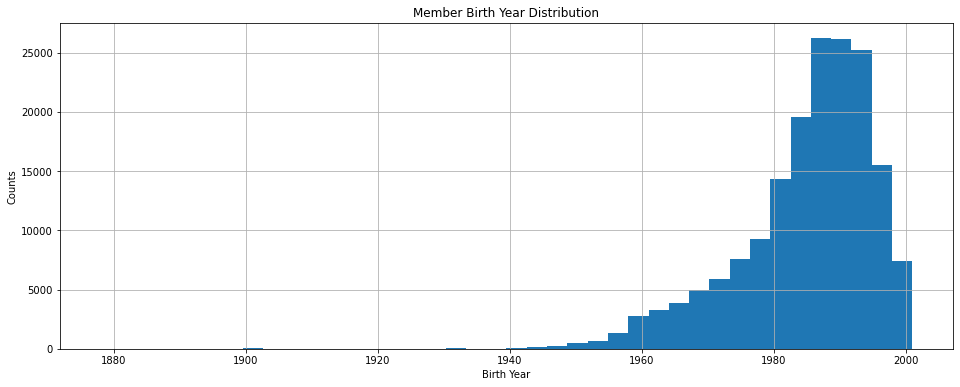

In [8]:
# Plot Histogram
plt.figure(figsize=(16,6))
df.member_birth_year.hist(bins=40)

# Update Plot Info
plt.xlabel('Birth Year')
plt.ylabel('Counts')
plt.title('Member Birth Year Distribution');

After getting the general trend, I will to create a higher resolution histogram to see if there are any interesting trend. As indicated below, seems like people are rounding their birth year to numbers ending in 5s and 0s.

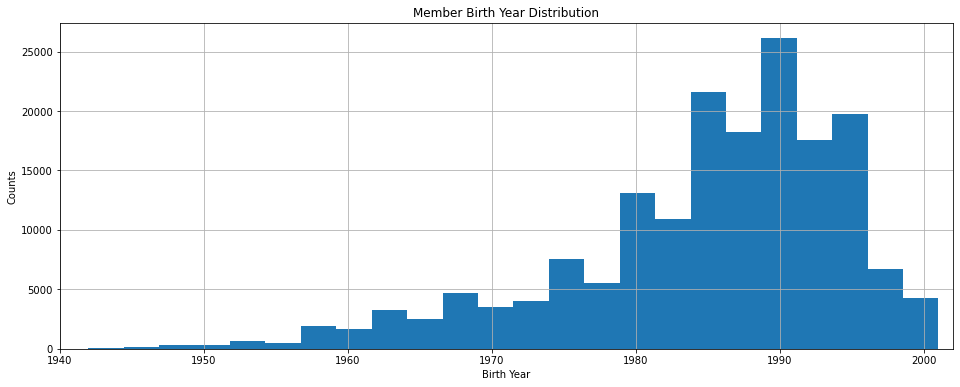

In [9]:
# Plot Histogram with higher resolution and zoom into core data
plt.figure(figsize=(16,6))
df.member_birth_year.hist(bins=50)
plt.xlabel('Birth Year')
plt.ylabel('Counts')
plt.xlim([1940, 2002])
plt.title('Member Birth Year Distribution');

Another important information to establish market demographic is the rider gender. Is this a service that attract more of a gender tyoe? As shown in the historgram below, the bikeshare service clearly attract more male than female.

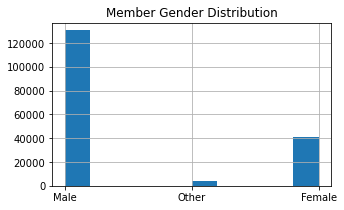

In [10]:
# Plot rider gender distribution histogram
plt.figure(figsize=(5,3))
df.member_gender.hist()
plt.title('Member Gender Distribution');

After establish some basic information about who the riders are, I want to see where are the most popular starting and ending locations for the bike rides. For starting station, seems like most people starts on Market St.

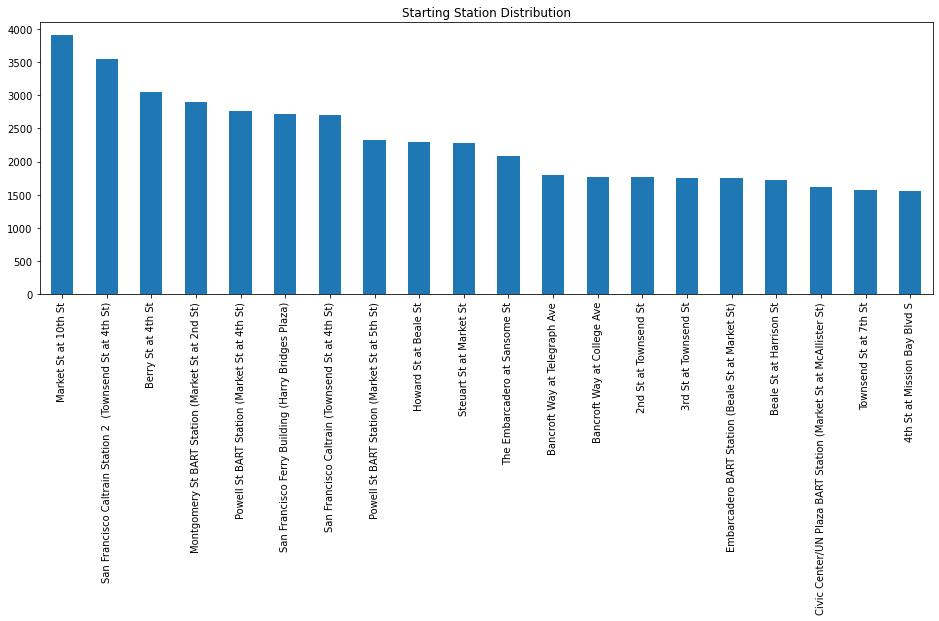

In [11]:
# Count how many times a starting station appears and plot in descending order
plt.figure(figsize=(16,5))
df.start_station_name.value_counts()[:20].plot.bar()
plt.title('Starting Station Distribution');

As for the most popular ending station, San Francisco Caltrain Station 2 is the clear winner. So does that mean a majority of the people are using the service to commute to a train station?

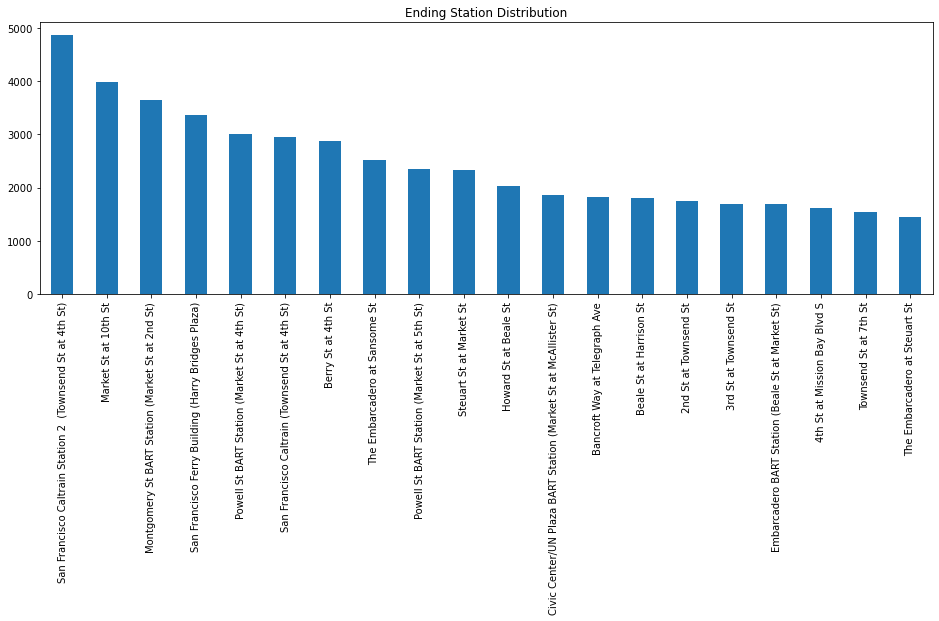

In [12]:
# Count how many times an ending station appears and plot in descending order
plt.figure(figsize=(16,5))
df.end_station_name.value_counts()[:20].plot.bar()
plt.title('Ending Station Distribution');

Next, let's see how the ride duration is distributed. Seems like there are lots of variability in riding duration, with the peak center in the lower numbers, let's zoom in to find out more.

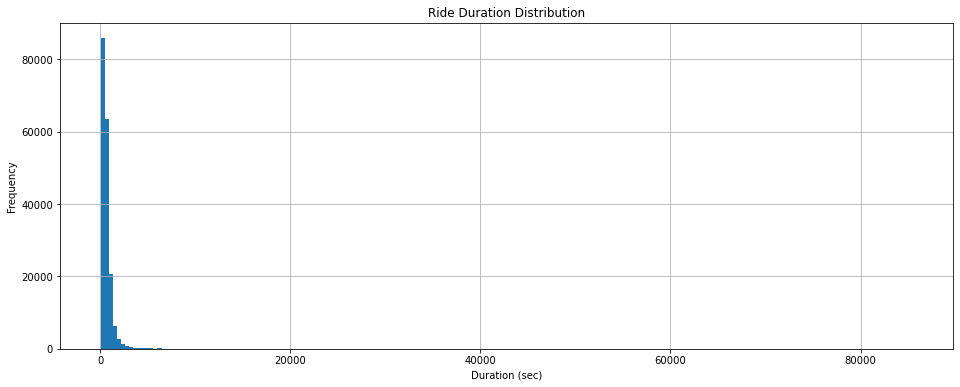

In [13]:
# Plot ride duration distribution
plt.figure(figsize=((16,6)))
df.duration_sec.hist(bins=200)
plt.title('Ride Duration Distribution')
plt.xlabel('Duration (sec)')
plt.ylabel('Frequency');

After zooming into the distribution, seems like most riders have very short ride, like around 5 minutes. However, there are also longer rides into 30 minutes and hours range. The ride duration is a smooth right skewed normal distribution. 

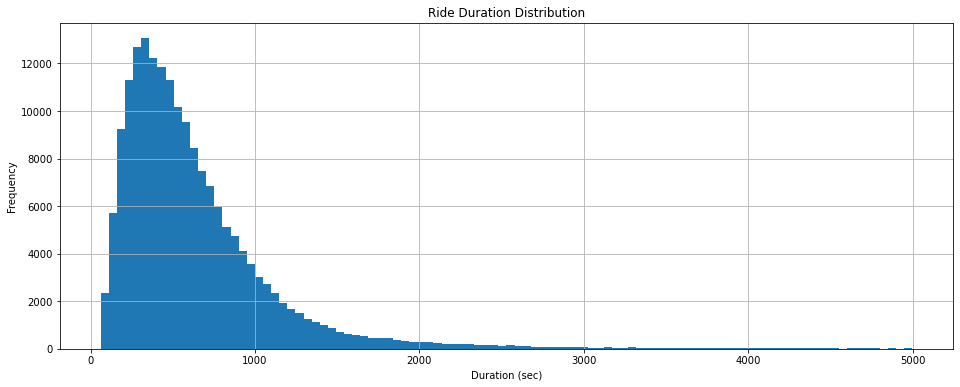

In [14]:
# Plot ride duration distribution after trimming outliers
plt.figure(figsize=((16,6)))
df.query('duration_sec < 5000')['duration_sec'].hist(bins=100)
plt.title('Ride Duration Distribution')
plt.xlabel('Duration (sec)')
plt.ylabel('Frequency');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Looking at rider demographics, most riders are male borned around 1990. It is very intersting when looking at the birth year plot, the population seems to centerlize on numbers like 75/80/85/90/95. A potential explaination is that some riders want to have some privacy and don't give their exact birth year. There are also indivudals who are borned in 1880s and 1900s, those birth year are unreliable since they would probably be too old to ride a bike at that age.

The starting and ending station is a hard cateogrical data to plot, since there are so many of them. Therefore, I can only plot the top 20 to see which stations are the most popular.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Other than the fact that the birth year data is artifically "rigged" by the riders, it depcit a left skew normal distribution that centered on riders borned in the 90s. Everything else is relatively normal.

## Bivariate Exploration


In [15]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

So we established who the riders are, let's see if gender play a role in prohibiting usage of the service as people age. A box plot will be perfect for this. As shown in the plot below, statistics for all 3 gender types are very close. Therefore, gender minimally affect wether a user can enjoy the service as they age.

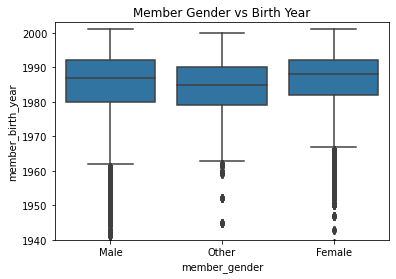

In [16]:
# Plot boxplot of member gender vs member birth year and zoom into core data
sb.boxplot(data=df, x='member_gender', y='member_birth_year', color=sb.color_palette()[0])
plt.ylim([1940,2003])
plt.title('Member Gender vs Birth Year');

Okay, how about performance? Do male necessarily performs better than female? Since this is not a race, let's use the ride duration as the comparing metric. Once again, as shown in the plot below, gender minimally affect the ride eduration. However, it is important to note that perhaps most people are only going on short ride, maybe this is not the best metric for performance comparison. 

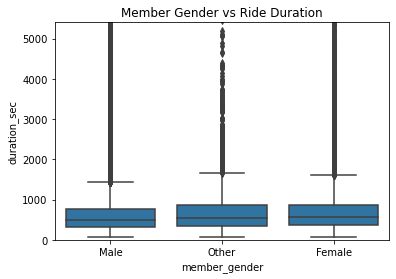

In [17]:
# Plot boxplot of member gender vs ride duration and zoom into core data
sb.boxplot(data=df, x='member_gender', y='duration_sec', color=sb.color_palette()[0])
plt.ylim([0,3600*1.5])
plt.title('Member Gender vs Ride Duration');

Alright, since gender don't play much of a role in determining ride duration, how about age? It is expected that younger rider will probably perform better than their elder counterpart. As shown in the scatter plot below, As the birth year increases, the ride duration also increases. This confirm the theory that younger rider has better performance.

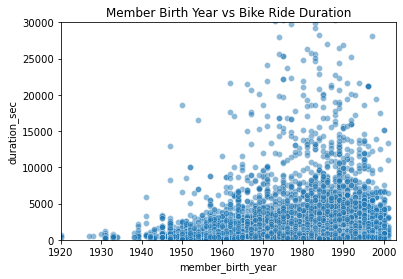

In [18]:
# Create scatter plot to compare ride duration and member birth year
sb.scatterplot(data=df, x='member_birth_year', y='duration_sec', alpha=0.5)
plt.xlim([1920,2003])
plt.ylim([0,30000])
plt.title('Member Birth Year vs Bike Ride Duration');

Most business perform better when they can predict amount of the renevue they can receive regularly. Hence, subscription model is more preferrable to businesses. Let's see how GoBike are doing, are people subscribing to the monthly services? Who are the riders who subscribe?  As it turns out, there are actually more bikeshare subscribers than per-use customers! It can be seen in the histogram below, there are actually higher subscriber to per-trip customer ratio for riders born in the 90s. This probably suggestes that they are tech savy enough to know the benefit of a subscription service and also having the economic power to afford it. Perhaps they are also using the service to commute regularly, instead of joyriding once in a while to sightsee.

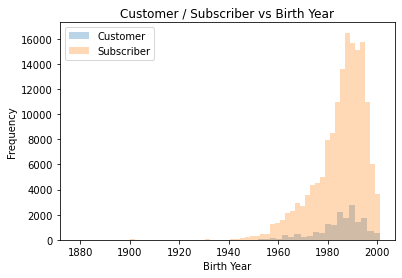

In [19]:
# Overlay per-trip customer and subscriber's birth year distribtion
df.groupby('user_type').member_birth_year.plot.hist(bins=50, alpha=0.3)
plt.legend()
plt.xlabel('Birth Year')
plt.title('Customer / Subscriber vs Birth Year');

Okay, now we learned a lot about the riders demographic, let's see where they are going! Particularly, what is the top 10 routes for the bikeshare service? The company will probably need to invest more resources to meet the demand. As it turns out, a lot of people are traveling between Berry St (Lyft HQ) and the San Francisco Ferry Building. A lot of people are also riding from the San Francisco Ferry Building to the Embarcadero, which is a technology company. So this support the theory that people are using this service for computig to work.

In [20]:
# Generate DataFrame with Top 10 Routes
df_routes = df.groupby(['start_station_name','end_station_name']).size().reset_index().rename(columns={0:'count'}).sort_values(by=['count'], ascending=False)[:10]
df_routes = df_routes.reset_index(drop=True)
df_routes

,start_station_name,end_station_name,count
0,Berry St at 4th St,San Francisco Ferry Building (Harry Bridges Pl...,337
1,San Francisco Ferry Building (Harry Bridges Pl...,The Embarcadero at Sansome St,314
2,Grand Ave at Perkins St,19th Street BART Station,310
3,The Embarcadero at Sansome St,Steuart St at Market St,285
4,19th Street BART Station,Grand Ave at Perkins St,284
5,Townsend St at 7th St,San Francisco Caltrain Station 2 (Townsend St...,272
6,Market St at 10th St,Montgomery St BART Station (Market St at 2nd St),272
7,San Fernando St at 7th St,5th St at Virginia St,249
8,Market St at 10th St,Powell St BART Station (Market St at 4th St),247
9,5th St at Virginia St,San Fernando St at 7th St,242


In [21]:
# Create a String Array with starting and ending station
routes = np.array(df_routes.start_station_name + ' < - > ' + df_routes.end_station_name)

In [22]:
df_routes['routes'] = routes

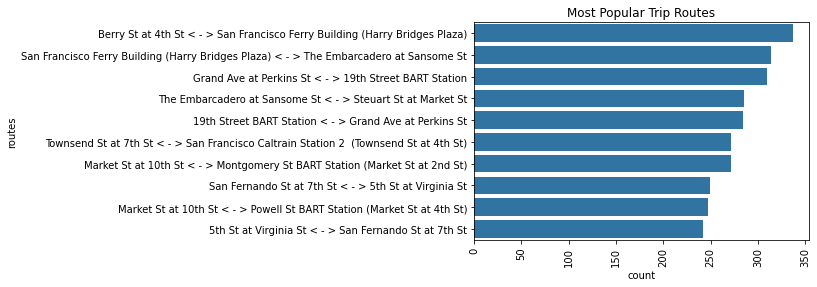

In [23]:
# Create bar chart to disply top 10 most popular routes
sb.barplot(data=df_routes, y='routes', x='count', color=sb.color_palette()[0]);
plt.xticks(rotation=90);
plt.title('Most Popular Trip Routes');

Alright, one last insight to see if we can confirm our theory that most subscribers are using the service for commuting. If the subscribers are taking advantage of the service to address the San Fracisco traffic issue, than their ride should be shorter than that of the per-use customers, who primarily use the service for sightseeing and joyrides. As shown in the bar chart below, per-trip customers more than double the average ride duration than the subscription riders! 

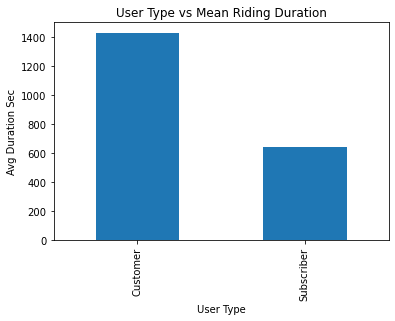

In [24]:
# Plot bar chart to compare per-trip cusomter vs subscriber's ride duration patttern
df.groupby('user_type').mean()['duration_sec'].plot.bar();
plt.ylabel('Avg Duration Sec')
plt.xlabel('User Type')
plt.title('User Type vs Mean Riding Duration');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the box plots above, it appears that rider gender don't play a big role in determining features like birth year and ride duration. They are all very close to each other. This datatset imply that biking is a sport that fit all genders. And as expected, as member birth year increase, hence the younger the rider, the bike ride duration generally increases. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I am also interested in looking at the demographic of rider who are customer vs subscribers. It seems that there are way more subscribers than per-ride customers, which is interesting. It seems that the bikeshare program is quite successful in retaining and converting customer into long-term users. It appears that the subscription plan appeal toward the 1985 - 1995 rider group more than others. 

## Multivariate Exploration


Cool, we learned a lot about the riders and the popular staions. Now let see if we can geographically show where the hotspots are and identify traffic pattern. In theory, it will be nice if the riders can evenly spread out the bikes so that they will always be available. If everyone is transporting to bike to a few stations and not bringing them back, soon, we will run out of bikes. We will have to haul the bikes back to the starting station so people can use them. This is bad as it will incur additional costs.

In [25]:
# Define function to plt stations on a map and indicate how popular they are
def plotMap(data, title, lat=0, lon=0,  padding = 0, figsize=(10,10)):

    # Calculate Starting and Ending station appearance frequency
    start_station_count = df['start_station_id'].value_counts()
    start_station_count = start_station_count.sort_index()

    end_station_count = df['end_station_id'].value_counts()
    end_station_count = end_station_count.sort_index()

    df_mean = df.groupby('start_station_id').mean()

    # Plot Stations on Scatter plot, color and size according for starting/ending station and station popularity
    plt.figure(figsize=figsize)
    sb.scatterplot(data=df_mean, x='start_station_longitude', y='start_station_latitude', s=start_station_count/10, alpha=0.5)
    sb.scatterplot(data=df_mean, x='end_station_longitude', y='end_station_latitude', s=end_station_count/10, alpha=0.5)
    plt.title(title)
    plt.legend(['Start Station', 'End Station'])

    # Zoom into Particular Region
    if padding != 0:
        plt.ylim([lat-padding,lat+padding])
        plt.xlim([lon-padding,lon+padding])

From a general overview, it seems that GoBike operates in 3 distinct geological ara. After looking up the geocoordinate, they appears to be San Fracisco, Berkly and San Jose! Let's zoom in to look at the traffic pattern.

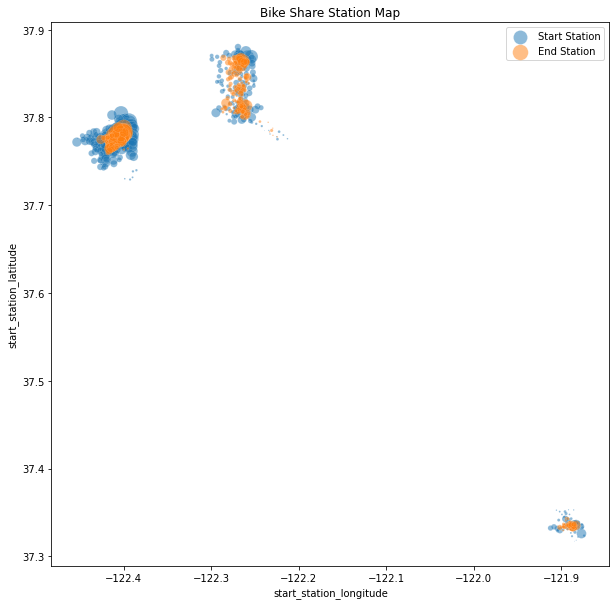

In [26]:
# Plot Map Level view for the Station
plotMap(df, title='Bike Share Station Map')

In the San Francisco area, seems like a lot of people are starting their rides along the coast. This is espeically true in the Fisherman's Wharf area. Perhaps a lot of people take the ferry or that there are majoy train stations there. And then they almost all move into the center of town. This is bad! We need to transport the bikes back to the coast! Surprisinly, not many people are biking to the Gold Gate area, not many tourist willing to do the scenic trail I guess. 

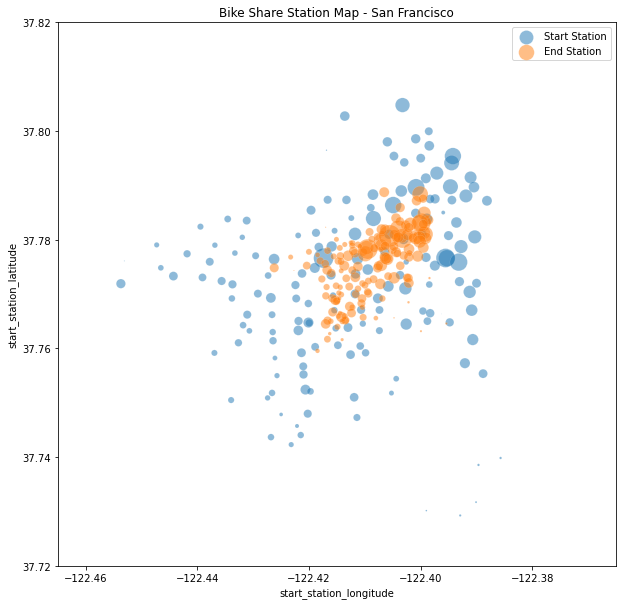

In [27]:
# Focus station map for the San Francisco Area
plotMap(df, lat = 37.77, lon = -122.415, padding = 0.05, title='Bike Share Station Map - San Francisco')

Let's take a look at the Berkley Area, similar story, most people start the ride from the outside toward the center of town. 

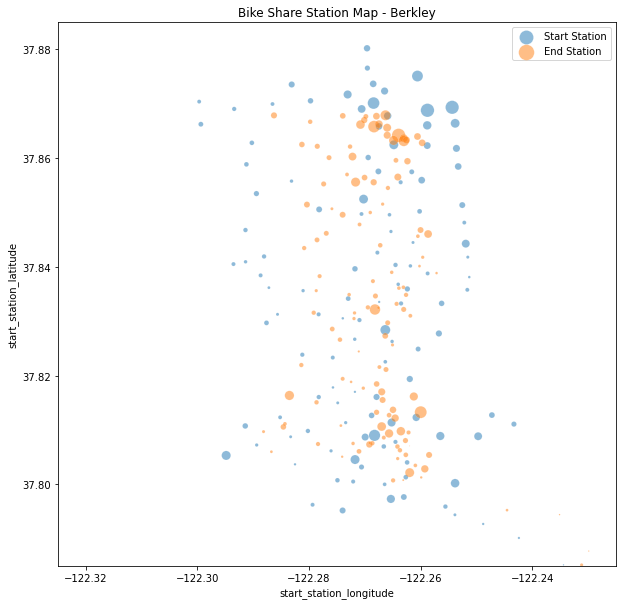

In [28]:
# Focus station map for the Berkley Area
plotMap(df, lat = 37.835, lon = -122.275, padding = 0.05, title='Bike Share Station Map - Berkley')

Now we are at San Jose, again, same case. People are riding from the outside of town toward the center.

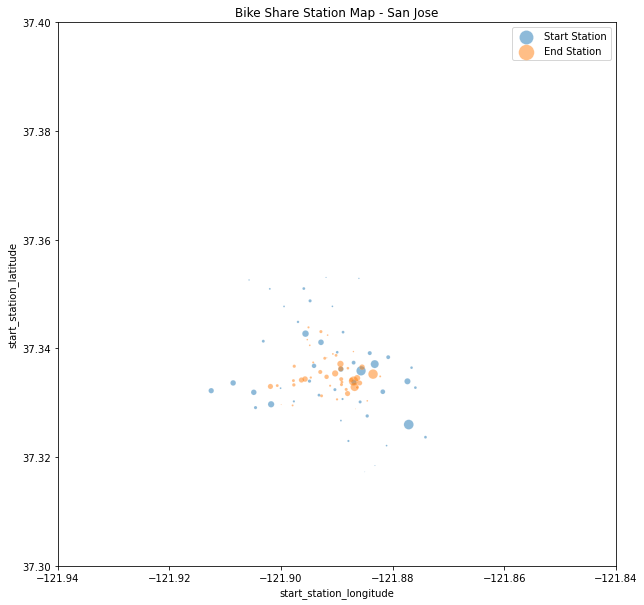

In [29]:
# Focus station map for the San Jose Area
plotMap(df, lat = 37.35, lon = -121.89, padding = 0.05, title='Bike Share Station Map - San Jose')

Okay, so we know this traffic direction is bad, we need to send trucks to balance the station bike inventory through out the day. Now let's take a look to see when demand is highest. Let's focus on the most popular starting station and ending station.

In [30]:
df_hot = df.query('start_station_name == "Market St at 10th St"').copy()

In [31]:
df_hot['start_time'] = df_hot['start_time'].astype('datetime64[ns]')

In [32]:
# Dividing Traffic into 8 different time bins
traffic = []
label = []

for i in range(8):
    traffic.append(df_hot[(df_hot['start_time'].dt.hour >= i*3) & (df_hot['start_time'].dt.hour < (i+1)*3)].shape[0])
    label.append(f'{i*3} to {(i+1)*3}')

As shown in the plot below, seems like people are starting to ride at 6 am and continued until around 9 pm. The demand is pretty consistent throughout the day. So it is probably wise to keep this station stocked throughout the day.

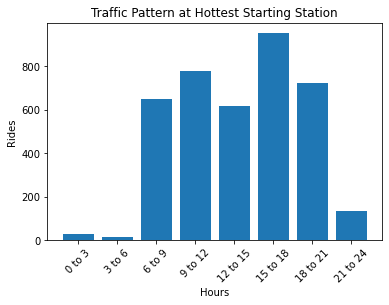

In [33]:
# Plot bar chart comparing traffic at different time
plt.bar(x=label, height=traffic)
plt.xticks(rotation=45);
plt.xlabel('Hours')
plt.ylabel('Rides')
plt.title('Traffic Pattern at Hottest Starting Station');

Does a popular ending station have different traffic pattern?

In [34]:
end_name = df.end_station_name.value_counts().index[0]

In [35]:
df_hot2 = df.query(f'end_station_name == "{end_name}"').copy()

In [36]:
df_hot2['end_time'] = df_hot2['end_time'].astype('datetime64[ns]')

In [37]:
# Dividing Traffic into 8 different time bins

traffic = []
label = []
for i in range(8):
    traffic.append(df_hot2[(df_hot2['end_time'].dt.hour >= i*3) & (df_hot2['end_time'].dt.hour < (i+1)*3)].shape[0])
    label.append(f'{i*3} to {(i+1)*3}')

Let's take a look at the ending station. Huh, this is very different than that of the starting station! Seems like most people end their ride around 6am-9am and the 3pm-6pm area! This is around the time when people get to and get off work. In that case, we should probably arrange the bike transportation truck to be more active after those time. 

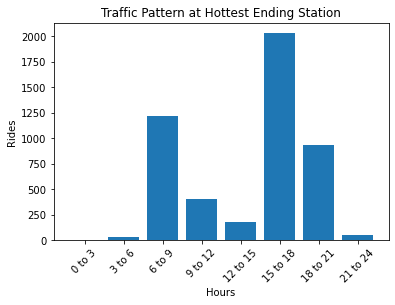

In [38]:
# Plot bar chart comparing traffic at different time

plt.bar(x=label, height=traffic)
plt.xticks(rotation=45);
plt.xlabel('Hours')
plt.ylabel('Rides')
plt.title('Traffic Pattern at Hottest Ending Station');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

After plotting the station locations, it appears that the bikeshare program focuses primarily on 3 geographic area. We can see 3 distinct clusters in the mapping plot. There is a clear trend that customers are more likely to get on the bike from the outskirt of town and end up leaving the bike in the center of town. This trend is particularly clear in the Top Left corner cluster. Perhaps it is neccessary to focus analysis to only 1 geographical area. 

### Were there any interesting or surprising interactions between features?

When analyizing the hotest station at Market Street, it seems that the rider starts at 6 am and then drop off very rapidly at 9 pm. Surprisingly, the ride traffic is relatively similar from 6 am to 9 pm, thought there is a search at 9 pm and 3 pm. This is probably when people are going and getting out of work. This indicated that the GoBike program is benefical for school / work commute. THis effect is more pronouce when looking at the ending time at the hottest destination station. People tends to finish their ride from 6am - 9am and 3pm - 6pm. 

## Conclusions
In conclusion, Ford's GoBike program operates in 3 geographical areas in this dataset. The riders are mostly male who are borned in the 80s/90s and slowly tapper off as the age get olders. According to the plots, rider gender does not have much impact on rider endurance. In addition, riders of all gender have similar borth year statistic, meaning that gender does not play much of a role in stopping rider at a certain age. However, younger riders are more likely to go on longer rides as expected. Riders who are borned in the 90s are also much more likely to be a program subscriber than a per-ride customer. This is probably due to their "tech saviness" to understand the benefit of such program and also having the economic power to enroll in the program. It is also note worthy that per-trip customers tends to have longer average trip duration. They are most likely tourist who are visitng the city. Therefore they go on longer trips and don't need the subscription program. Looking at the start / end stations, the hottest stations are San Fracisco Cal Train Station 2 and Market Street. In terms of travel route, the most popular routes are from Berry St to San Francisco Ferry Station and San Francisco Ferry Station to the Embarcadero. From a map-level view, rider tends to start rides from the outside of the city into downtown. This is true for all 3 geographical areas!